In [4]:
import os
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf




### importing and handling all the files

In [5]:
!wget https://storage.googleapis.com/learning-datasets/horse-or-human.zip -O horse-or-human.zip

--2025-05-03 16:57:04--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   181MB/s    in 0.8s    

2025-05-03 16:57:05 (181 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [6]:
import zipfile

local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')
zip_ref.close()

In [7]:
Train_dir ='horse-or-human'

print(os.listdir())
print(os.listdir(Train_dir))

['.config', 'horse-or-human.zip', 'horse-or-human', 'sample_data']
['horses', 'humans']


In [8]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')


In [9]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse09-5.png', 'horse21-8.png', 'horse24-4.png', 'horse31-6.png', 'horse19-5.png', 'horse46-4.png', 'horse02-2.png', 'horse40-5.png', 'horse04-3.png', 'horse24-8.png']
['human09-06.png', 'human06-03.png', 'human04-22.png', 'human01-20.png', 'human07-02.png', 'human12-01.png', 'human15-24.png', 'human03-14.png', 'human16-14.png', 'human12-02.png']
total training horse images: 500
total training human images: 527


### CNN Model

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])


## ImageDataGenerator and Training model
It is a pipeline tool
Reads images from the given directory

Rescales pixel values (e.g., from [0, 255] to [0, 1])

Resizes images to a fixed target_size (e.g., 300x300)

Converts labels from folder names (like horse/, human/)

Batches the data (128 images per batch here)

Optionally applies augmentation (like flips, rotations)

In [12]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/horse-or-human',
    target_size = (300, 300),
    batch_size=128,
    class_mode= 'binary'
)

Found 1027 images belonging to 2 classes.


fit() was used to train models with generators — i.e., data that comes batch-by-batch from something like ImageDataGenerator

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  ## batch size 8
      epochs=15,
      verbose=2)

Epoch 1/15
8/8 - 7s - 832ms/step - acc: 0.9433 - loss: 0.1401
Epoch 2/15
8/8 - 1s - 106ms/step - acc: 0.9766 - loss: 0.0875
Epoch 3/15
8/8 - 7s - 864ms/step - acc: 0.9778 - loss: 0.0594
Epoch 4/15
8/8 - 1s - 112ms/step - acc: 0.8984 - loss: 0.1847
Epoch 5/15
8/8 - 6s - 784ms/step - acc: 0.8509 - loss: 0.9814
Epoch 6/15
8/8 - 1s - 108ms/step - acc: 0.8828 - loss: 0.3927
Epoch 7/15
8/8 - 9s - 1s/step - acc: 0.9355 - loss: 0.2105
Epoch 8/15
8/8 - 1s - 107ms/step - acc: 0.9922 - loss: 0.0676
Epoch 9/15
8/8 - 7s - 856ms/step - acc: 0.9844 - loss: 0.0549
Epoch 10/15
8/8 - 1s - 110ms/step - acc: 0.9922 - loss: 0.0300
Epoch 11/15
8/8 - 6s - 785ms/step - acc: 0.9900 - loss: 0.0384
Epoch 12/15
8/8 - 1s - 131ms/step - acc: 1.0000 - loss: 0.0271
Epoch 13/15
8/8 - 9s - 1s/step - acc: 0.9844 - loss: 0.0354
Epoch 14/15
8/8 - 1s - 110ms/step - acc: 0.9922 - loss: 0.0454
Epoch 15/15
8/8 - 9s - 1s/step - acc: 0.8910 - loss: 0.3027


## Predict using the model

Saving horse1.jpeg to horse1.jpeg


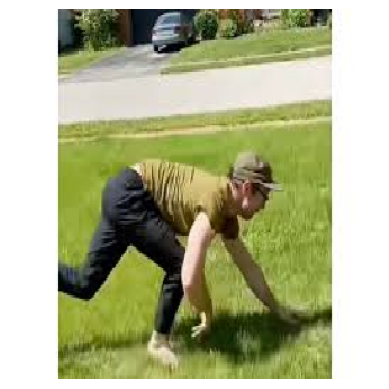

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted: Human


In [16]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Load and preprocess image
for fn in uploaded.keys():
    # Load image
    img_path = fn
    img = image.load_img(img_path, target_size=(300, 300))

    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert image to array
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0   # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Make batch of 1

    # Predict
    prediction = model.predict(img_array)

    # Interpret result
    if prediction[0][0] > 0.5:
        print("Predicted: Human")
    else:
        print("Predicted: Horse")
